In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# splitting the data
from sklearn.model_selection import train_test_split

# Ml Algorithms
# Linear Regression
from sklearn.linear_model import LinearRegression
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
# XGB BOOST Regressor
import xgboost as xgb

# checking accuracy
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

# for pickling the modelling
import pickle

In [2]:
df = pd.read_csv('car-data.csv')

In [3]:
df.sample(10)

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,model
7433,2016,8999,Manual,21510,Petrol,20,60.1,1.0,Honda,City
7323,2017,12495,Semi-Auto,35276,Petrol,20,61.4,1.4,Ford,EcoSport
1622,2017,11750,Manual,59383,Petrol,0,65.7,1.0,Honda,Accord
1391,2016,16298,Manual,29441,Diesel,20,67.3,2.0,Ford,Aspire
13450,2019,39995,Semi-Auto,12209,Diesel,145,33.6,2.0,Tata,Harrier
6450,2016,10499,Manual,50415,Diesel,20,70.6,1.6,BMW,X1
12744,2018,8850,Manual,1378,Petrol,145,54.3,1.0,BMW,3 Series
6140,2019,30990,Semi-Auto,6000,Hybrid,135,43.5,1.4,Toyota,Camry
13682,2019,47990,Semi-Auto,1099,Diesel,145,34.0,3.0,Tata,Tiago
7804,2019,19000,Semi-Auto,4000,Petrol,150,39.8,2.0,Toyota,Innova


In [4]:
df.shape

(15157, 10)

In [5]:
df.isnull().sum()

year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
brand           0
model           0
dtype: int64

In [6]:
df["car_age"] = 2021 - df["year"]

df.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,model,car_age
0,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,Kia,Sonet,2
1,2019,26883,Automatic,4562,Diesel,145,49.6,2.0,Volkswagen,Vento,2
2,2019,20000,Manual,7414,Diesel,145,50.4,2.0,Hyundai,i20,2
3,2019,33492,Automatic,4825,Petrol,145,32.5,2.0,Tata,Harrier,2
4,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,Volkswagen,Vento,2


In [7]:
df.year.value_counts()

year
2019    4669
2017    2947
2016    2647
2018    1509
2015    1153
2020    1046
2014     580
2013     315
2012      80
2011      57
2010      41
2009      31
2008      27
2007      20
2006      16
2005       8
2001       4
2004       3
2003       2
2002       1
2000       1
Name: count, dtype: int64

In [8]:
year_counts = pd.DataFrame(data = df.year.value_counts())

In [10]:
year_counts.reset_index(inplace=True)

In [9]:
year_counts.rename(columns={'index':'year','year':'counts'},inplace=True)
year_counts

,count
year,
2019,4669
2017,2947
2016,2647
2018,1509
2015,1153
2020,1046
2014,580
2013,315
2012,80


ValueError: Could not interpret value `counts` for `y`. An entry with this name does not appear in `data`.

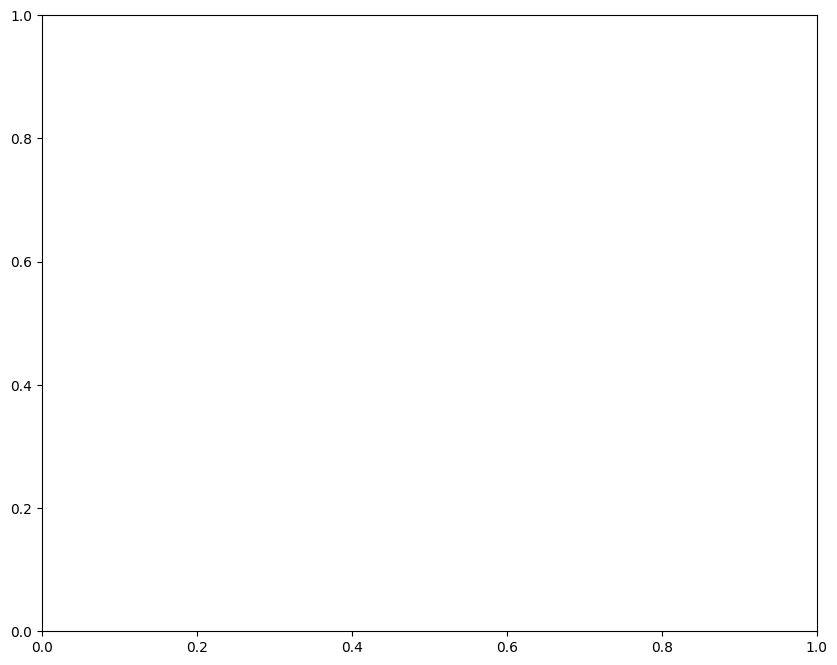

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='year',y='counts',data=year_counts)


C:\Users\ommal\AppData\Local\Temp\ipykernel_18164\1492679872.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"],bins=15)


<Axes: xlabel='price', ylabel='Density'>

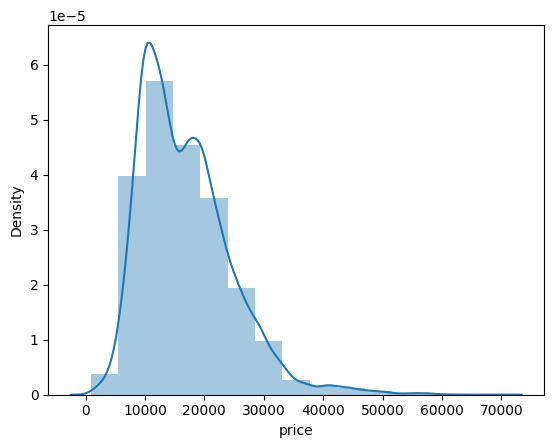

In [12]:
sns.distplot(df["price"],bins=15)

<Axes: ylabel='price'>

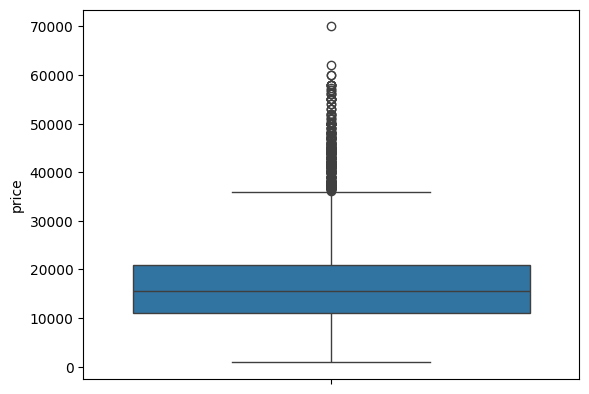

In [13]:
sns.boxplot(df["price"])

In [14]:
# dropping outrange values called as outliers
df[df["price"]>df["price"].quantile(.99)]

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,model,car_age
11849,2019,43995,Automatic,2927,Other,150,30.4,2.0,Toyota,Camry,2
13391,2020,47000,Automatic,1001,Diesel,145,33.6,2.0,Hyundai,Creta,1
13397,2019,52999,Semi-Auto,3365,Diesel,145,29.4,2.0,Kia,Carens,2
13401,2019,46795,Semi-Auto,6280,Diesel,145,33.6,2.0,Ford,Endeavour,2
13402,2020,43495,Semi-Auto,2000,Diesel,150,33.6,2.0,Volkswagen,Polo,1
...,...,...,...,...,...,...,...,...,...,...,...
15123,2019,57991,Automatic,10288,Diesel,260,33.2,2.0,Ford,EcoSport,2
15124,2019,57991,Automatic,6739,Diesel,260,33.2,2.0,BMW,3 Series,2
15125,2019,57991,Automatic,7259,Diesel,260,33.2,2.0,Tata,Nexon,2
15126,2019,57991,Automatic,7486,Diesel,260,33.2,2.0,Honda,Accord,2


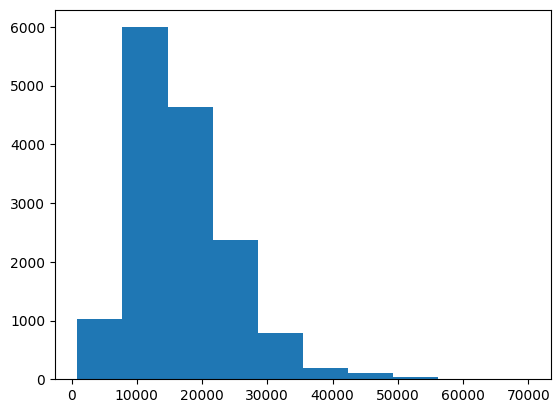

In [15]:
plt.hist(df["price"])
plt.show()

In [20]:
df.transmission.value_counts()

transmission
Manual       9417
Semi-Auto    3780
Automatic    1960
Name: count, dtype: int64

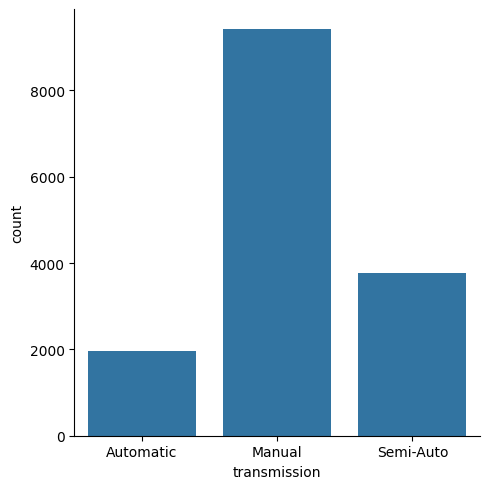

In [21]:
sns.catplot(x='transmission',kind="count",data=df)

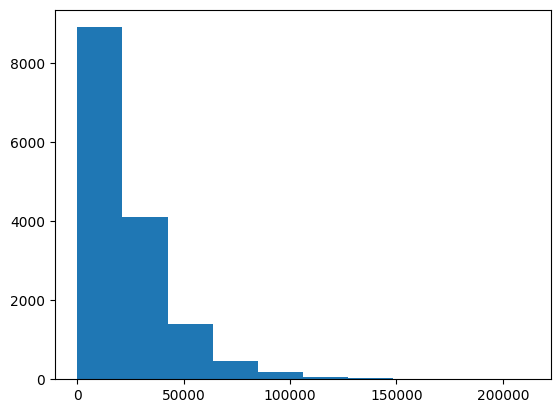

In [22]:
plt.hist(df["mileage"])
plt.show()

<Axes: >

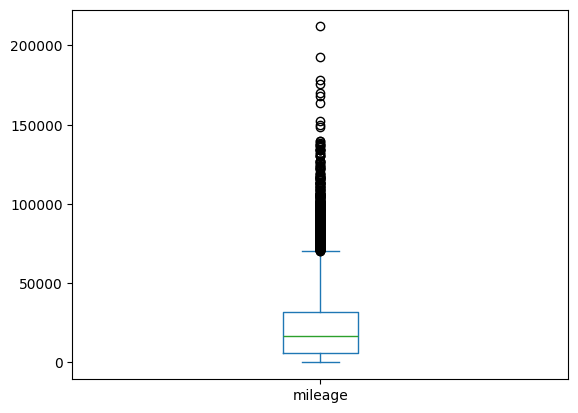

In [23]:
df["mileage"].plot(kind='box')

In [24]:
df[df["mileage"]>df["mileage"].quantile(.99)]

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,model,car_age
761,2010,4995,Manual,99000,Diesel,125,57.6,2.0,Kia,Sonet,11
774,2004,1287,Manual,170000,Diesel,165,52.3,2.0,Tata,Tiago,17
787,2013,6999,Manual,100000,Diesel,0,74.3,1.6,Hyundai,Venue,8
789,2010,7999,Manual,101000,Diesel,125,57.6,2.0,Tata,Harrier,11
4394,2009,2999,Manual,101702,Diesel,20,68.9,1.6,Mercedes,A-Class,12
...,...,...,...,...,...,...,...,...,...,...,...
15014,2008,2295,Manual,111000,Diesel,155,48.7,2.0,Volkswagen,Passat,13
15015,2012,3995,Manual,110750,Diesel,20,67.3,1.6,Ford,Endeavour,9
15083,2016,8888,Automatic,108808,Diesel,125,58.9,2.0,Honda,Jazz,5
15110,2012,6695,Manual,98000,Diesel,30,60.1,2.0,Maruti,Brezza,9


In [25]:
df.fuelType.value_counts()

fuelType
Petrol    8553
Diesel    6372
Hybrid     145
Other       87
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='fuelType'>

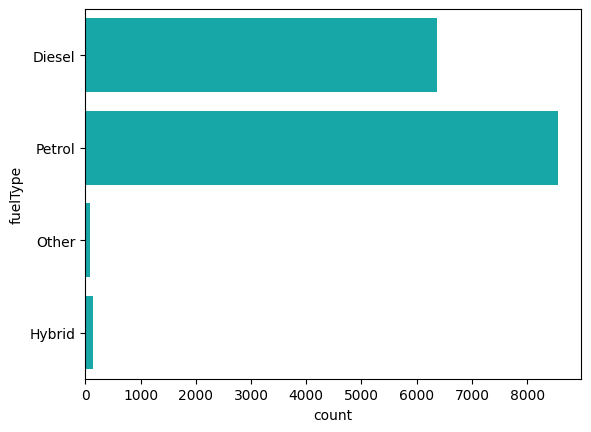

In [26]:
sns.countplot(y='fuelType',data=df,color='c')


C:\Users\ommal\AppData\Local\Temp\ipykernel_11896\1936994989.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tax'])


<Axes: xlabel='tax', ylabel='Density'>

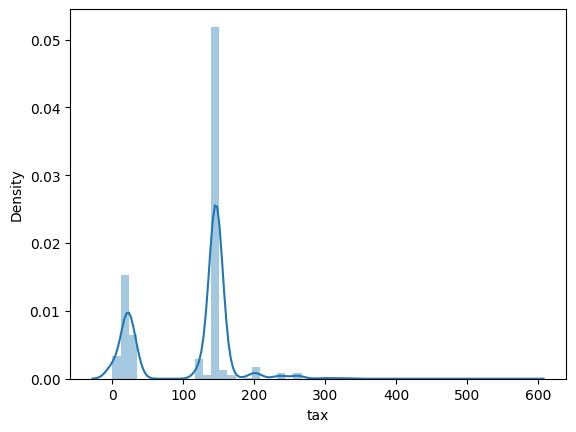

In [27]:
sns.distplot(df['tax'])


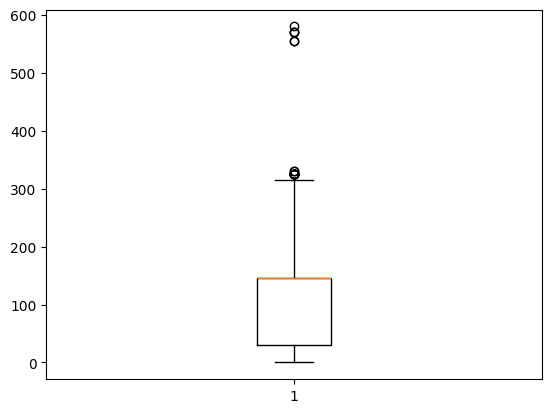

In [28]:
plt.boxplot(df['tax'])
plt.show()

<Axes: ylabel='tax'>

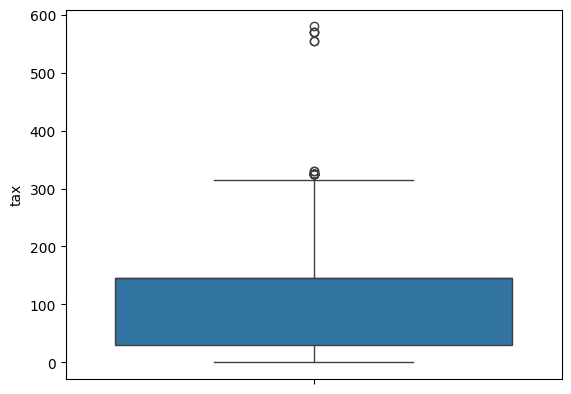

In [29]:
sns.boxplot(df['tax'])

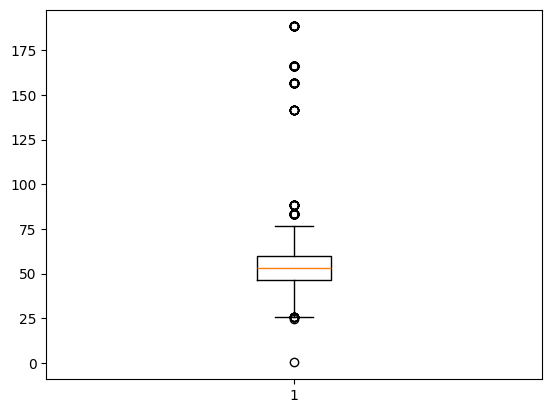

In [33]:
plt.boxplot(df['mpg'])
plt.show()

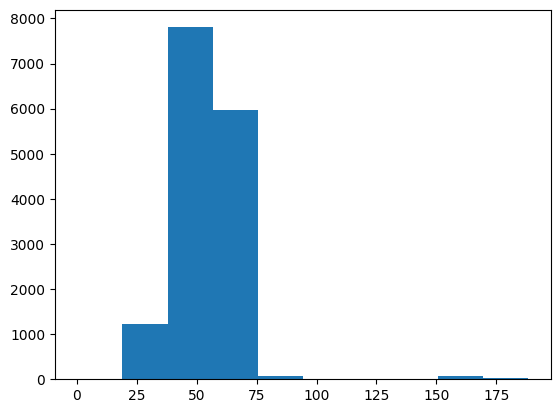

In [34]:
plt.hist(df["mpg"],bins=10)
plt.show()

<Axes: ylabel='engineSize'>

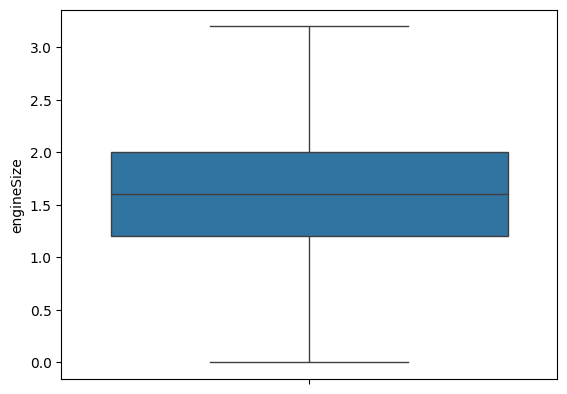

In [35]:
sns.boxplot(df['engineSize'])


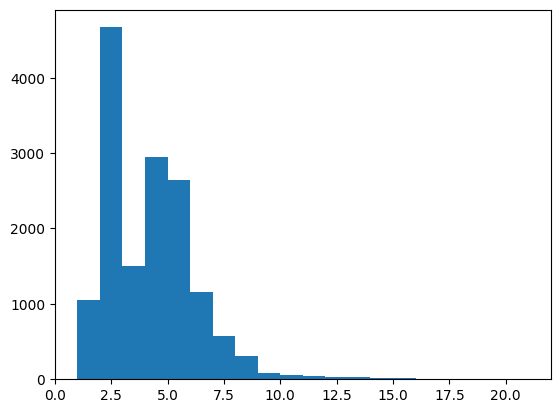

In [36]:
plt.hist(df['car_age'],bins=20)
plt.show()

<Axes: ylabel='car_age'>

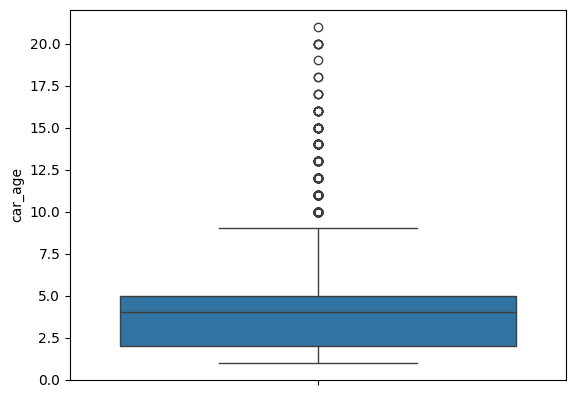

In [37]:
sns.boxplot(df['car_age'])

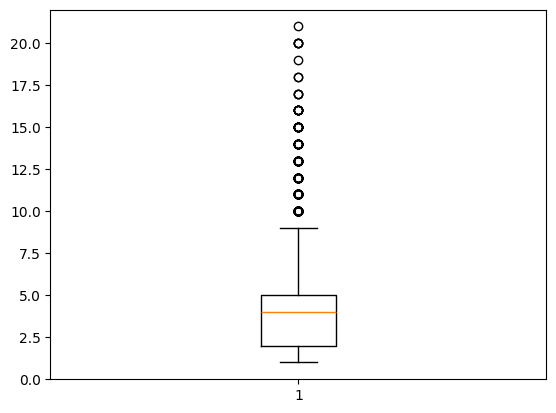

In [38]:
plt.boxplot(df['car_age'])
plt.show()

In [39]:
df = df.drop(['year'],axis=1)
df.head()

,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,model,car_age
0,25000,Automatic,13904,Diesel,145,49.6,2.0,Kia,Sonet,2
1,26883,Automatic,4562,Diesel,145,49.6,2.0,Volkswagen,Vento,2
2,20000,Manual,7414,Diesel,145,50.4,2.0,Hyundai,i20,2
3,33492,Automatic,4825,Petrol,145,32.5,2.0,Tata,Harrier,2
4,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,Volkswagen,Vento,2


In [40]:
df.shape

(15157, 10)

In [41]:
df = df.replace({'Automatic': 0, 'Manual': 1, 'Semi-Auto': 2})

df = df.replace({'Diesel': 0, 'Petrol': 1, 'Hybrid': 2, 'Other': 3})

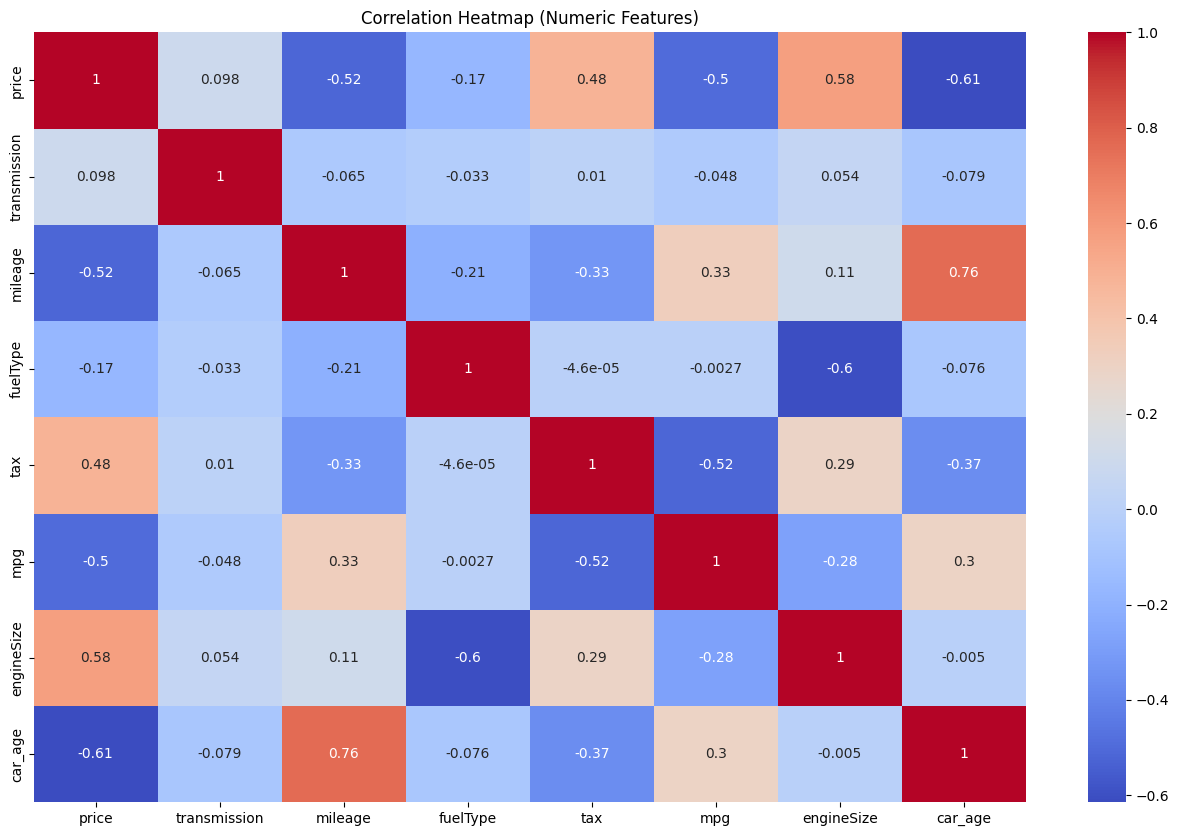

In [49]:
plt.figure(figsize=(16,10))
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


## Splitting target and independent columns

In [50]:
X=df.drop(["price"],axis=1)
X.head()

y = df["price"]
y

0        25000
1        26883
2        20000
3        33492
4        22900
         ...  
15152     5990
15153     1799
15154     1590
15155     1250
15156     2295
Name: price, Length: 15157, dtype: int64

In [51]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

X_train.shape, X_test.shape

((12125, 9), (3032, 9))

## LINEAR REGRESSION

In [53]:
X = df.drop("price", axis=1)  # Replace 'price' with your target column
y = df["price"]

# Convert categorical columns to numeric
X = pd.get_dummies(X)

# Now split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
#lin_reg = LinearRegression()
#lin_reg.fit(X_train,y_train)

LinearRegression()

In [54]:
# for training dataset
lin_reg.score(X_train,y_train)

# for testing dataset
lin_reg.score(X_test,y_test)

0.7581335283561439

In [55]:
lin_reg_predict = lin_reg.predict(X_test)

In [46]:
# checking error rate
print("MAE:", mean_absolute_error(y_test,lin_reg_predict))
print("MSE:", mean_squared_error(y_test,lin_reg_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test,lin_reg_predict)))

MAE: 2465.5258059238345
MSE: 14291420.68553133
RMSE: 3780.399540462797


In [56]:
print("Linear Regression accuracy : ",r2_score(y_test,lin_reg_predict))

Linear Regression accuracy :  0.7581335283561439


## RANDOM FOREST REGRESSOR

In [57]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [58]:
rfr.score(X_train,y_train)

rfr.score(X_test,y_test)

0.9393594544108038

In [59]:
rfr_predict = rfr.predict(X_test)

In [60]:
# checking error rate
print("MAE:", mean_absolute_error(y_test,rfr_predict))
print("MSE:", mean_squared_error(y_test,rfr_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test,rfr_predict)))

MAE: 1216.6343338516144
MSE: 3598516.1443291907
RMSE: 1896.9755254955692


In [61]:
print("Random Forest Regression accuracy : ",r2_score(y_test,rfr_predict))

Random Forest Regression accuracy :  0.9393594544108038


## XG BOOST

In [62]:
xgboost = xgb.XGBRegressor(random_state=1,learning_rate=0.1)
xgboost.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [63]:
xgboost.score(X_test,y_test)

xgboost.score(X_train,y_train)

0.9552692032870367

In [64]:
xgb_predict = xgboost.predict(X_test)

In [65]:
# checking error rate
print("MAE:", mean_absolute_error(y_test,xgb_predict))
print("MSE:", mean_squared_error(y_test,xgb_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test,xgb_predict)))

MAE: 1294.6775366951733
MSE: 3820223.6788592697
RMSE: 1954.5392497617615


In [66]:
print("XG BOOST Regression accuracy : ",r2_score(y_test,xgb_predict))

XG BOOST Regression accuracy :  0.9356233406028037


## Bayesian Regression

In [67]:
from sklearn.linear_model import BayesianRidge

In [68]:
model = BayesianRidge()
model.fit(X_train, y_train)

BayesianRidge()

In [69]:
prediction = model.predict(X_test)

In [70]:
# Evaluation of r2 score of the model against the test set
print(f"Bayesian Regression accuracy : {r2_score(y_test, prediction)}")

Bayesian Regression accuracy : 0.7582032853953058


# PICKLE

In [71]:
# Random Forest Reg. Pickle

f = open('rfr.pickle', 'wb')
pickle.dump(rfr, f)
f.close()

In [72]:
# XG Boost Reg. Pickle

f = open('xgboost.pickle', 'wb')
pickle.dump(xgboost, f)
f.close()

## DONE